In [1]:
%matplotlib notebook
import longview as lv

In [2]:
cli_train = lv.WatchClient()
cli_test = lv.WatchClient()
plot = lv.LinePlot()

<IPython.core.display.Javascript object>


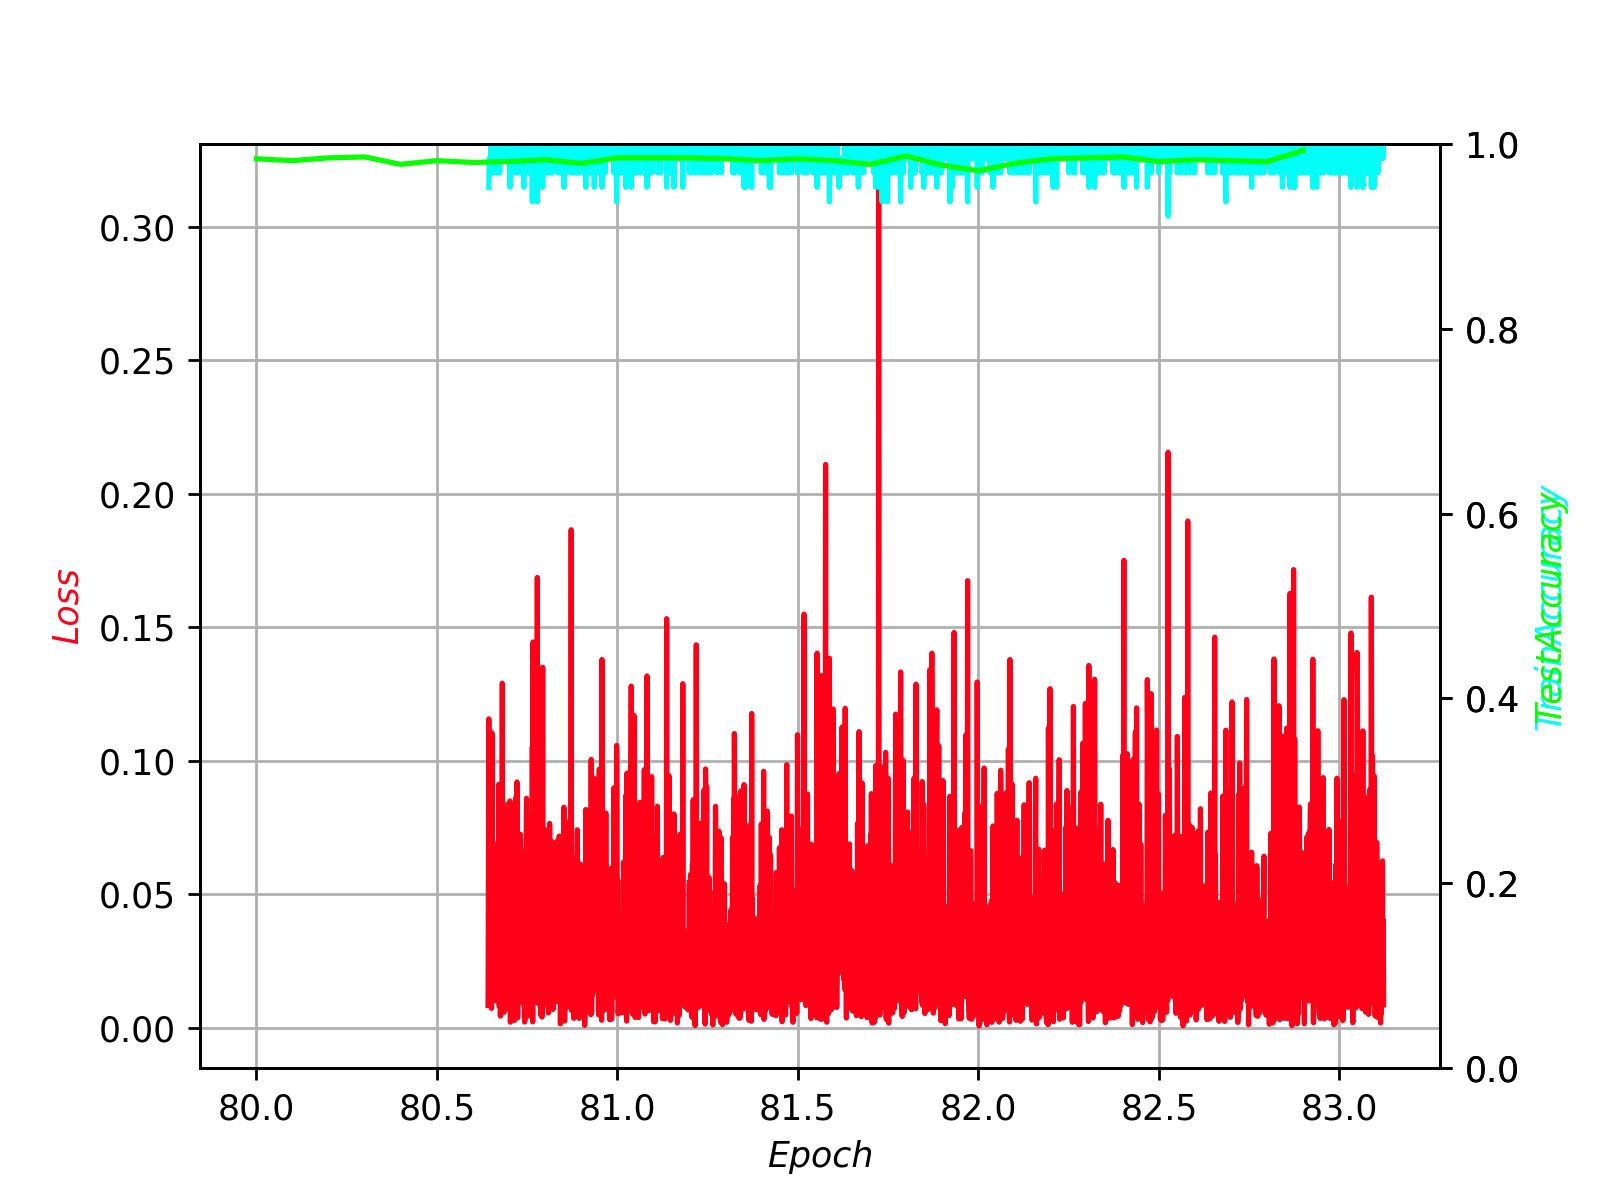

In [3]:
train_batch_loss = cli_train.create_stream('batch', 'map(lambda d:d.metrics.batch_loss, l)')
plot.show(train_batch_loss, xlabel='Epoch', ylabel='Loss')

In [4]:
train_batch_accuracy = cli_train.create_stream('batch', 'map(lambda d:d.metrics.batch_accuracy, l)')
plot.show(train_batch_accuracy, xlabel='Epoch', ylabel='TrainAccuracy', ylim=(0,1))

In [5]:
test_batch_accuracy = cli_test.create_stream('batch', 'map(lambda d:d.metrics.batch_accuracy, l)')
plot.show(test_batch_accuracy, xlabel='Epoch', ylabel='TestAccuracy', ylim=(0,1))

<IPython.core.display.Javascript object>


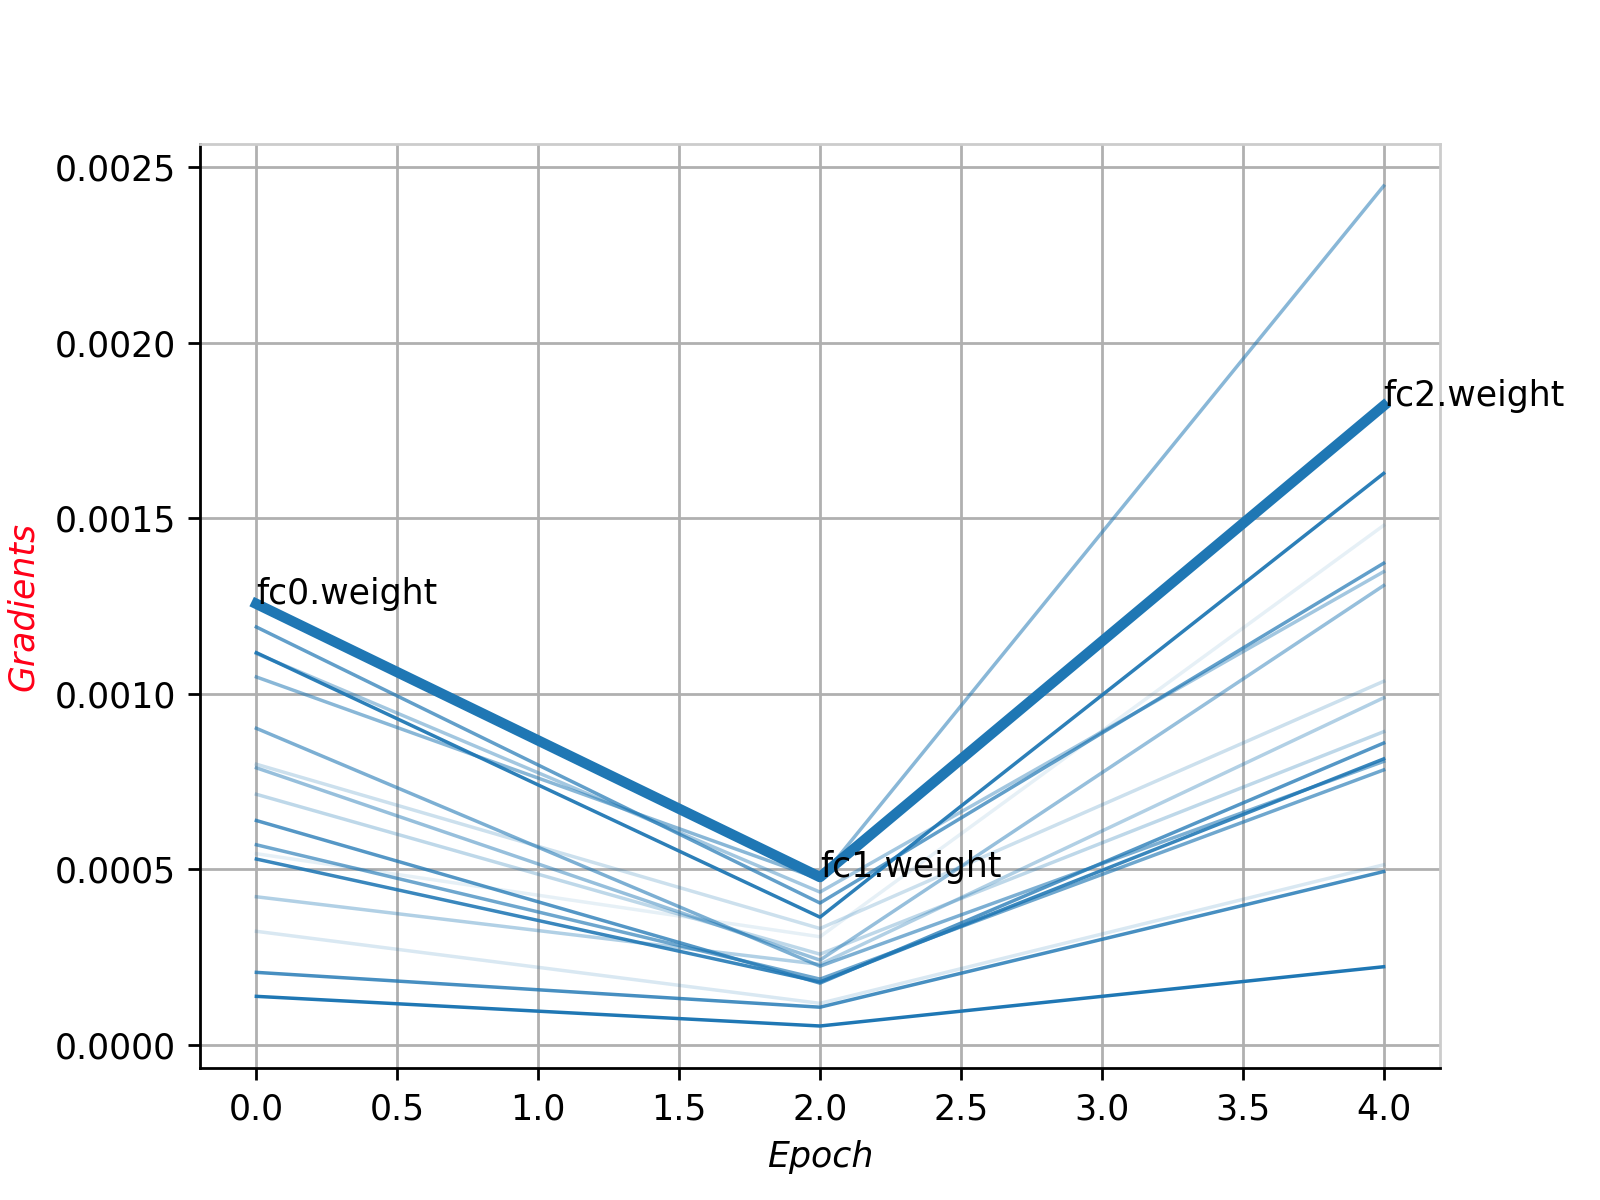

In [6]:
grads = cli_train.create_stream('batch', 'map(lambda d:avg_abs_grads(d.model), l)', throttle=3)
grad_plot = lv.LinePlot()
grad_plot.show(grads, xlabel='Epoch', ylabel='Gradients', redraw_after=0, keep_old=20, dim_old=True)